In [1]:
import boto3
import pandas as pd

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
## Dropping No
house_price = house_price.drop(columns = ['No'])
house_price.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


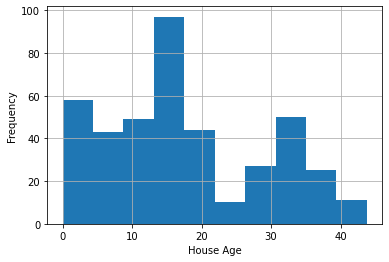

In [3]:
import matplotlib.pyplot as plt

plt.hist(house_price['house_age'])
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# The distribution is right-skewed bi-modal

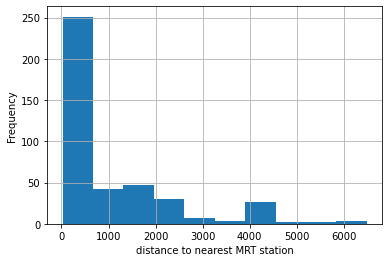

In [4]:
plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.xlabel('distance to nearest MRT station')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## The distribution is right-skewed with one peak.

In [5]:
from sklearn.linear_model import LinearRegression

## Defining the input and target variables
X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

## Building the model
lm_md = LinearRegression().fit(X, Y)
lm_md.coef_

array([-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,  2.37767191e+02,
       -7.80545273e+00])

In [6]:
## Defining the characteritics of the new house
new_house = [[5, 500, 3, 24.98, 121.49]]

## Predicting the price of unit of area
lm_md.predict(new_house)

array([45.55979721])